In [4]:
import psycopg2

In [5]:
conn = psycopg2.connect('dbname = Amazon user= postgres password = data host= 127.0.0.1 port = 5432')
curr = conn.cursor()

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from sklearn.preprocessing import LabelEncoder
# loading package for the label encoding
import datetime as dt
# package used for converting the data into datetime format

In [8]:
df = pd.read_sql_query('SELECT "productType", "asin", "author", "availabilityAmazon","binding","categoryTree_0", "categoryTree_1", "categoryTree_2","categoryTree_3","categoryTree_4","ean","hasReviews", "isEligibleForSuperSaverShipping", "isEligibleForTradeIn", "isRedirectASIN", "isSNS", "languages_0", "lastPriceChange", "lastRatingUpdate", "lastUpdate", "listedSince", "newPriceIsMAP", "numberOfItems", "numberOfPages", "packageHeight", "packageLength", "packageQuantity", "packageWeight", "packageWidth", "productGroup", "publicationDate", "publisher", "releaseDate", "rootCategory","stats_atIntervalStart", "stats_avg", "stats_avg30", "stats_avg90", "stats_avg180", "stats_current", "stats_outOfStockPercentage30","stats_outOfStockPercentage90", "stats_outOfStockPercentageInInterval", "title", "trackingSince", "type", "upc", "price", "sales_rank" FROM public.\"keepaclean1"',con=conn)

In [9]:
df = df.set_index('asin')

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df = df.drop(['ean'], axis =1)

In [12]:
df.dtypes

productType                              int64
author                                  object
availabilityAmazon                       int64
binding                                 object
categoryTree_0                          object
categoryTree_1                          object
categoryTree_2                          object
categoryTree_3                          object
categoryTree_4                          object
hasReviews                               int64
isEligibleForSuperSaverShipping          int64
isEligibleForTradeIn                     int64
isRedirectASIN                           int64
isSNS                                    int64
languages_0                             object
lastPriceChange                          int64
lastRatingUpdate                         int64
lastUpdate                               int64
listedSince                              int64
newPriceIsMAP                            int64
numberOfItems                            int64
numberOfPages

In [13]:
cols = ['releaseDate', 'publicationDate']
df[cols] = df[cols].apply(pd.to_numeric, errors = 'coerce', axis=1)

In [14]:
df.dtypes

productType                              int64
author                                  object
availabilityAmazon                       int64
binding                                 object
categoryTree_0                          object
categoryTree_1                          object
categoryTree_2                          object
categoryTree_3                          object
categoryTree_4                          object
hasReviews                               int64
isEligibleForSuperSaverShipping          int64
isEligibleForTradeIn                     int64
isRedirectASIN                           int64
isSNS                                    int64
languages_0                             object
lastPriceChange                          int64
lastRatingUpdate                         int64
lastUpdate                               int64
listedSince                              int64
newPriceIsMAP                            int64
numberOfItems                            int64
numberOfPages

In [17]:
df["author"].fillna("No Information", inplace = True)
# Replacing missing values with "No Information"
df['author'].isnull().sum().sum()
# No null values after imputing the NaN values

0

In [18]:
df["binding"].fillna("Audible Audiobook", inplace = True)
# Replacing missing values with "Audible Audiobook"
df['binding'].isnull().sum().sum()
# No null values after imputing null values

0

In [19]:
df["categoryTree_0"].fillna("Books", inplace = True)
df['categoryTree_0'].value_counts()
# replacing missing category tree_0 values with "Books" which is the mode value of the column

Books                                  100113
Home & Kitchen                              4
Sports & Outdoors                           3
Pet Supplies                                3
Office Products                             2
Clothing, Shoes & Jewelry                   2
Movies & TV                                 1
Health Care                                 1
Toys & Games                                1
Cell Phones & Accessories                   1
Instrument Accessories                      1
Baby Products                               1
Stationery & Gift Wrapping Supplies         1
Name: categoryTree_0, dtype: int64

In [20]:
df["categoryTree_1"].fillna("Subjects", inplace = True)
# replacing missing category tree_1 values with "Subjects" which is the mode value of the column
df['categoryTree_1'].value_counts()

Subjects                     100113
Sports & Fitness                  3
Kitchen & Dining                  3
Women                             2
Cases, Holsters & Sleeves         1
Office Electronics                1
Dogs                              1
Novelty & Gag Toys                1
Movies                            1
Office & School Supplies          1
Stationery                        1
Nursery                           1
Foot Health                       1
Cats                              1
Bedding                           1
Fish & Aquatic Pets               1
Guitar & Bass Accessories         1
Name: categoryTree_1, dtype: int64

In [21]:
df["categoryTree_2"].fillna("Not Available", inplace = True)
# replacing missing category tree_2 values with a new category called "Not Available" since there are many categories in the column
df['categoryTree_2'].value_counts()

Literature & Fiction                               17493
Children's Books                                   12746
Self-Help                                           9807
Christian Books & Bibles                            6901
Biographies & Memoirs                               5441
Business & Money                                    5088
Arts & Photography                                  4383
Mystery, Thriller & Suspense                        4058
Health, Fitness & Dieting                           3710
Science Fiction & Fantasy                           3291
Romance                                             3160
Not Available                                       3006
History                                             2547
Cookbooks, Food & Wine                              2471
Reference                                           1867
Teen & Young Adult                                  1752
Humor & Entertainment                               1594
Crafts, Hobbies & Home         

In [22]:
df["categoryTree_3"].fillna("Not Available", inplace = True)
# replacing missing category tree_3 values with "Not Available" value i.e. creating a new category in the column
df['categoryTree_3'].value_counts()

Genre Fiction                             8239
Not Available                             7241
Christian Living                          3553
Animals                                   3518
Literature & Fiction                      3368
Growing Up & Facts of Life                3224
Fantasy                                   3106
Mystery                                   2889
Action & Adventure                        2470
Classics                                  2373
Motivational                              1729
Relationships                             1648
Historical                                1612
Contemporary                              1537
Music                                     1386
Memoirs                                   1344
Americas                                  1207
Thrillers & Suspense                      1158
United States                             1131
Humor                                     1114
Personal Transformation                   1113
Management & 

In [23]:
df["categoryTree_4"].fillna("No further info", inplace = True)
# replacing missing category tree_4 values with "No further info" value
df['categoryTree_4'].value_counts()

No further info                            34972
Historical                                  2708
Family Life                                 2253
United States                               1996
Fantasy                                     1703
Horror                                      1667
Friendship, Social Skills & School Life     1291
Family Saga                                  833
Police Procedurals                           743
Contemporary                                 690
Mystery, Thriller & Suspense                 661
Spiritual Growth                             656
Women Sleuths                                641
Instruments                                  612
Epic                                         599
Action & Adventure                           568
Dogs                                         531
Activity Books                               503
Leadership                                   487
Psychological                                479
Women's Issues      

In [24]:
df["languages_0"].fillna("English,Published", inplace = True)
df['languages_0'].value_counts()
# replacing the missing values with the "English Published" since it is clearly the mode of the column

English,Published                      96330
English,Original Language               2621
Spanish,Published                        646
english,published                        240
German,Published                          64
French,Published                          61
English                                   33
Italian,Published                         20
Spanish,Original Language                 12
Multilingual,Published                    12
Chinese,Published                         11
Portuguese,Published                      10
Arabic,Published                           8
Mandarin Chinese,Published                 8
German,Original Language                   5
Japanese,Published                         5
Danish,Published                           4
Norwegian,Published                        4
Hebrew,Published                           3
Russian,Published                          3
Turkish,Original Language                  2
Latin,Published                            2
Romanian,O

In [20]:
df['productGroup'].value_counts()

Book                                54652
Audible                             44925
Digital Software                      206
Musical Instruments                   102
Single Detail Page Misc                78
Toy                                    18
Office Product                         18
BISS                                   15
BISS Basic                             12
Sports                                 11
Photography                            10
Baby Product                           10
Kitchen                                 8
Art and Craft Supply                    8
Ebook Bundle                            7
Magazine                                7
Shoes                                   6
Automotive Parts and Accessories        5
Collectibles                            4
Home                                    4
Art                                     4
Health and Beauty                       3
Lawn & Patio                            2
Pet Products                      

In [25]:
df['productGroup'].fillna("Book", inplace = True)
df['productGroup'].isnull().sum().sum()

0

In [26]:
df["publisher"].fillna("No publisher Info", inplace = True)
# replacing missing publisher values with "No publisher Info" value
df['publisher'].isnull().sum().sum()

0

In [27]:
df = df.drop(['upc'], axis =1)

In [28]:
df['type'].fillna("ABIS_BOOK", inplace = True)
df['type'].isnull().sum().sum()


0

In [29]:
df['title'].fillna("No Information", inplace = True)
df['title'].isnull().sum().sum()

0

In [30]:
df.dtypes

productType                              int64
author                                  object
availabilityAmazon                       int64
binding                                 object
categoryTree_0                          object
categoryTree_1                          object
categoryTree_2                          object
categoryTree_3                          object
categoryTree_4                          object
hasReviews                               int64
isEligibleForSuperSaverShipping          int64
isEligibleForTradeIn                     int64
isRedirectASIN                           int64
isSNS                                    int64
languages_0                             object
lastPriceChange                          int64
lastRatingUpdate                         int64
lastUpdate                               int64
listedSince                              int64
newPriceIsMAP                            int64
numberOfItems                            int64
numberOfPages

In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [42]:
ll = ['author','binding','categoryTree_0','categoryTree_1','categoryTree_2','categoryTree_3','categoryTree_4','languages_0','productGroup','publisher','title','type']

In [44]:
df_processed = pd.get_dummies(df, prefix_sep="__", columns=ll)


In [47]:
df = df_processed

In [48]:
df.head(5)

,productType,availabilityAmazon,hasReviews,isEligibleForSuperSaverShipping,isEligibleForTradeIn,isRedirectASIN,isSNS,lastPriceChange,lastRatingUpdate,lastUpdate,...,type__SPIRITS,type__SPORTING_GOODS,type__SPORTS_MEMORABILIA,type__STRINGED_INSTRUMENTS,type__SWEATER,type__TEACHING_EQUIPMENT,type__TOOLS,type__TOYS_AND_GAMES,type__UNDERWEAR,type__WIRELESS_ACCESSORY
asin,,,,,,,,,,,,,,,,,,,,,
154204006X,0,0,1,1,0,0,0,1552176960,1552067040,1552183920,...,0,0,0,0,0,0,0,0,0,0
B07B3JQZCL,1,0,1,0,0,0,0,1547653920,1552181760,1552182000,...,0,0,0,0,0,0,0,0,0,0
B07JHVJ5SC,0,-1,0,0,0,0,0,1544624400,-1,1552184880,...,0,0,0,0,0,0,0,0,0,0
B00XJ108I6,0,-1,0,0,0,0,0,1538639760,-1,1552184880,...,0,0,0,0,0,0,0,0,0,0
1524763136,0,0,1,1,0,0,0,1552173360,1552169760,1552182120,...,0,0,0,0,0,0,0,0,0,0


In [27]:
ll = ['author','binding','categoryTree_0','categoryTree_1','categoryTree_2','categoryTree_3','categoryTree_4','languages_0','productGroup','publisher','title','type']

In [29]:
df.head(5)

,productType,author,availabilityAmazon,binding,categoryTree_0,categoryTree_1,categoryTree_2,categoryTree_3,categoryTree_4,hasReviews,...,stats_avg180,stats_current,stats_outOfStockPercentage30,stats_outOfStockPercentage90,stats_outOfStockPercentageInInterval,title,trackingSince,type,price,sales_rank
asin,,,,,,,,,,,,,,,,,,,,,
154204006X,0,12800,0,25,1,15,30,151,551,1,...,1477,1599,0,0,0,87098,1540041120,0,1599,1945
B07B3JQZCL,1,25576,0,4,1,15,3,128,38,1,...,2978,3099,0,1,1,8455,1519770480,18,-1,79
B07JHVJ5SC,0,33946,-1,32,1,15,7,21,234,0,...,-1,-1,100,100,100,51540,1541976000,20,-1,1
B00XJ108I6,0,599,-1,32,1,15,11,273,1391,0,...,-1,-1,100,100,100,71180,1538639760,20,-1,2
1524763136,0,25576,0,25,1,15,3,128,38,1,...,1944,1950,0,0,1,8455,1519588560,0,1788,3568


In [30]:
df = df[["productType", "author", "availabilityAmazon","binding","categoryTree_0", "categoryTree_1", "categoryTree_2","categoryTree_3","categoryTree_4", "hasReviews", "isEligibleForSuperSaverShipping", "isEligibleForTradeIn", "isRedirectASIN", "isSNS", "languages_0", "lastPriceChange", "lastRatingUpdate", "lastUpdate", "listedSince", "newPriceIsMAP", "numberOfItems", "numberOfPages", "packageHeight", "packageLength", "packageQuantity", "packageWeight", "packageWidth", "productGroup", "publicationDate", "publisher", "releaseDate", "rootCategory","stats_atIntervalStart", "stats_avg", "stats_avg30", "stats_avg90", "stats_avg180", "stats_current", "stats_outOfStockPercentage30","stats_outOfStockPercentage90", "stats_outOfStockPercentageInInterval", "title", "trackingSince", "type", "sales_rank", "price"]]

In [31]:
X = df.iloc[:, 0:45]
X.head(5)

,productType,author,availabilityAmazon,binding,categoryTree_0,categoryTree_1,categoryTree_2,categoryTree_3,categoryTree_4,hasReviews,...,stats_avg90,stats_avg180,stats_current,stats_outOfStockPercentage30,stats_outOfStockPercentage90,stats_outOfStockPercentageInInterval,title,trackingSince,type,sales_rank
asin,,,,,,,,,,,,,,,,,,,,,
154204006X,0,12800,0,25,1,15,30,151,551,1,...,1409,1477,1599,0,0,0,87098,1540041120,0,1945
B07B3JQZCL,1,25576,0,4,1,15,3,128,38,1,...,3064,2978,3099,0,1,1,8455,1519770480,18,79
B07JHVJ5SC,0,33946,-1,32,1,15,7,21,234,0,...,-1,-1,-1,100,100,100,51540,1541976000,20,1
B00XJ108I6,0,599,-1,32,1,15,11,273,1391,0,...,-1,-1,-1,100,100,100,71180,1538639760,20,2
1524763136,0,25576,0,25,1,15,3,128,38,1,...,1936,1944,1950,0,0,1,8455,1519588560,0,3568


In [32]:
y = df[['price']]
y.head(5)

,price
asin,
154204006X,1599
B07B3JQZCL,-1
B07JHVJ5SC,-1
B00XJ108I6,-1
1524763136,1788


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
names = X.columns

In [35]:
scale = StandardScaler()
X_df = scale.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=names)

C:\Anaconda3\envs\GT Capstone\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\envs\GT Capstone\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [36]:
X_df.head(5)

,productType,author,availabilityAmazon,binding,categoryTree_0,categoryTree_1,categoryTree_2,categoryTree_3,categoryTree_4,hasReviews,...,stats_avg90,stats_avg180,stats_current,stats_outOfStockPercentage30,stats_outOfStockPercentage90,stats_outOfStockPercentageInInterval,title,trackingSince,type,sales_rank
0,-0.892836,-0.515219,0.032436,0.127975,-0.012656,0.011749,0.490456,-0.209895,-0.891262,0.175983,...,-0.212521,-0.187398,-0.112441,-0.175682,-0.187165,-0.186729,1.601271,0.866179,-0.908350,-0.213769
1,1.072502,0.643631,0.032436,-1.003420,-0.012656,0.011749,-1.319466,-0.453849,-2.223255,0.175983,...,0.493513,0.437940,0.569281,-0.175682,-0.121669,-0.119589,-1.419130,0.615060,1.071602,-0.219916
2,-0.892836,1.402834,-4.213199,0.505106,-0.012656,0.011749,-1.051330,-1.588765,-1.714345,-5.682361,...,-0.814037,-0.803155,-0.839611,6.154904,6.362448,6.527228,0.235613,0.890149,1.291597,-0.220173
3,-0.892836,-1.621914,-4.213199,0.505106,-0.012656,0.011749,-0.783193,1.084121,1.289780,-5.682361,...,-0.814037,-0.803155,-0.839611,6.154904,6.362448,6.527228,0.989917,0.848819,1.291597,-0.220170
4,-0.892836,0.643631,0.032436,0.127975,-0.012656,0.011749,-1.319466,-0.453849,-2.223255,0.175983,...,0.012300,0.007161,0.047082,-0.175682,-0.187165,-0.119589,-1.419130,0.612806,-0.908350,-0.208422


In [37]:
y = y.reset_index(drop = True)

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
from yellowbrick.features.importances import FeatureImportances
from yellowbrick.features import RFECV

C:\Anaconda3\envs\GT Capstone\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


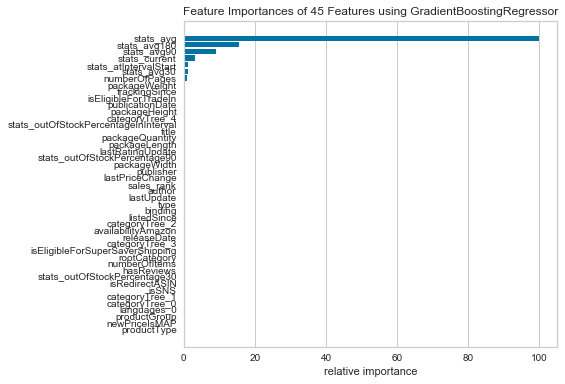

In [40]:
fig = plt.figure()
ax = fig.add_subplot()

viz = FeatureImportances(GradientBoostingRegressor(), ax=ax)
viz.fit(X_df, y)
viz.poof()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_df,y, test_size = 0.25, random_state = 39)

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [45]:
exp_variance = pca.explained_variance_ratio_

In [46]:
print(exp_variance)

[1.95867166e-01 1.28296755e-01 8.16003986e-02 4.28718088e-02
 3.35524635e-02 2.92970782e-02 2.90928600e-02 2.88711683e-02
 2.70680968e-02 2.64782489e-02 2.43214921e-02 2.28261913e-02
 2.20365981e-02 2.12176808e-02 2.06210720e-02 2.05638155e-02
 2.02946299e-02 1.98087866e-02 1.93895858e-02 1.83839181e-02
 1.74446592e-02 1.66022145e-02 1.59643614e-02 1.51212323e-02
 1.46801227e-02 1.46267000e-02 1.35515740e-02 9.54471572e-03
 8.37351258e-03 7.83598507e-03 7.08437667e-03 6.05301973e-03
 4.69943065e-03 4.30197080e-03 2.83446226e-03 1.84321864e-03
 1.58128139e-03 1.38930159e-03 1.17375806e-03 1.08909109e-03
 5.51872706e-04 4.02057633e-04 3.58365091e-04 2.83254718e-04
 1.49647606e-04]


In [47]:
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)

C:\Anaconda3\envs\GT Capstone\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [48]:
y_pred = reg.predict(X_test)

In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(y_test, y_pred)

0.8856080996700727

In [51]:
from sklearn import metrics

In [52]:
mse = metrics.mean_squared_error(y_test, y_pred)

In [53]:
print((metrics.mean_squared_error(y_test, y_pred)))

628885.7248129438


In [54]:
import math

In [55]:
math.sqrt(mse)

793.0231552817004

In [56]:
pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [57]:
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)

C:\Anaconda3\envs\GT Capstone\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [58]:
y_pred = reg.predict(X_test)

In [59]:
from sklearn.metrics import r2_score

In [60]:
r2_score(y_test,  y_pred)

0.8751742915413347

In [61]:
from sklearn import metrics

In [62]:
mse = metrics.mean_squared_error(y_test, y_pred)

In [63]:
print((metrics.mean_squared_error(y_test, y_pred)))

686247.067431394


In [64]:
import math

In [65]:
math.sqrt(mse)

828.4003062719098

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lr = LinearRegression()

In [68]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
lr.coef_

array([[216.76520922, 917.11947972, 146.51110895, -21.60483199,
        -20.87939266,  16.59919179]])

In [70]:
pred = lr.predict(X_test)

In [71]:
r2_score(y_test,  pred)

0.8541998606903137

In [72]:
mse = metrics.mean_squared_error(y_test, y_pred)
print((metrics.mean_squared_error(y_test, y_pred)))

686247.067431394


In [73]:
math.sqrt(mse)

828.4003062719098

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rfg = RandomForestRegressor()

In [76]:
rfg.fit(X_train, y_train)

C:\Anaconda3\envs\GT Capstone\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\envs\GT Capstone\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [77]:
pre = rfg.predict(X_test)

In [78]:
r2_score(y_test,  pre)

0.8513048833273934

In [79]:
mse = metrics.mean_squared_error(y_test, y_pred)
print((metrics.mean_squared_error(y_test, y_pred)))

686247.067431394


In [80]:
math.sqrt(mse)

828.4003062719098

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
dtg = DecisionTreeRegressor()

In [83]:
dtg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [84]:
pr = dtg.predict(X_test)

In [85]:
r2_score(y_test,  pr)

0.7571995528941898

In [86]:
mse = metrics.mean_squared_error(y_test, y_pred)
print((metrics.mean_squared_error(y_test, y_pred)))

686247.067431394


In [87]:
math.sqrt(mse)

828.4003062719098

In [88]:
from sklearn.neural_network import MLPRegressor

In [89]:
mr = MLPRegressor()

In [90]:
mr.fit(X_train, y_train)

C:\Anaconda3\envs\GT Capstone\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\envs\GT Capstone\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [91]:
prede = mr.predict(X_test)

In [92]:
r2_score(y_test,  prede)

0.8695782069247018

In [93]:
mse = metrics.mean_squared_error(y_test, y_pred)
print((metrics.mean_squared_error(y_test, y_pred)))

686247.067431394


In [94]:
math.sqrt(mse)

828.4003062719098

In [95]:
from sklearn.linear_model import Lasso

In [96]:
ls = Lasso()
ls.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [97]:
ls.coef_

array([216.65294982, 916.94809634, 146.24164904, -21.09141829,
       -20.22188489,  15.8390621 ])

In [98]:
pre_ls = ls.predict(X_test)

In [99]:
r2_score(y_test,  pre_ls)

0.8542248518641987

In [101]:
mse = metrics.mean_squared_error(y_test, pre_ls)
print((metrics.mean_squared_error(y_test, pre_ls)))

801419.5885433097


In [102]:
math.sqrt(mse)

895.2204133861726

In [103]:
gb = GradientBoostingRegressor()

In [105]:
from sklearn.model_selection import cross_val_score

In [109]:
score = cross_val_score(gb, X_train, y_train, cv = 10, scoring = 'r2')

C:\Anaconda3\envs\GT Capstone\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\envs\GT Capstone\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\envs\GT Capstone\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\envs\GT Capstone\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

In [111]:
print(score.mean())

0.8896025086236021


In [113]:
scr = print(cross_val_score(gb, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error').mean())

C:\Anaconda3\envs\GT Capstone\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\envs\GT Capstone\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\envs\GT Capstone\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\envs\GT Capstone\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

-712155.0200938717


In [117]:
math.sqrt(712155.02)

843.8927775493756